In [1]:
!pip install wordcloud scikit-learn --quiet

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# Import Data, Fuctions and Models

In [3]:
# Load pickled tf-idf pre-processed data
X_train_sparse, X_test_sparse, y_train_sparse, y_test_sparse, org_train, org_test = pd.read_pickle("pickles/sparse.pkl")

In [4]:
# add the preprocessing function used in notebook 1_preprocessing.ipynb to preprocess the reddit posts
# this function is needed to load the vectorizer.pkl file

def preprocess(text):
    stemmer = SnowballStemmer('english')
    stop_words = set(stopwords.words('english'))
    preprocessed_post = []
    
    # Mask URLs
    url = re.compile(r'(http?://|www\.)\S+')
    text = url.sub('[url]', text)
    
    # Iterate through tokens and POS tags (word_tokenize also removes white spaces and line breaks)
    for token, tag in nltk.pos_tag(gensim.utils.simple_preprocess(text)):
        pos=tag[0].lower()
        
        # Set POS tag if not in list
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
        
        # Check if token is a stop word
        if token not in stop_words:
            
            # Lowercase, lemmatize and stem, then append to output list
            preprocessed_post.append(stemmer.stem(WordNetLemmatizer().lemmatize(token.lower(), pos=pos)))
    
    return preprocessed_post

In [5]:
# Load the pickled vectorizer 
vectorizer, transformer = pd.read_pickle("pickles/vectorizer.pkl")

In [6]:
# Import LR model
lr_model = pd.read_pickle("pickles/logistic_regression_model_tfidf.pkl")

# Top Words for each Subreddit

In [7]:
# Predict LR model
lr_predictions = lr_model.predict(X_test_sparse)


Top features for class: BPD
['regul', 'boyfriend', 'ident', 'dissoci', 'edit', 'lamict', 'devalu', 'dea', 'eupd', 'abandon', 'cw', 'split', 'bdp', 'bpds', 'borderlin', 'pwbpd', 'dae', 'dbt', 'fp', 'bpd']


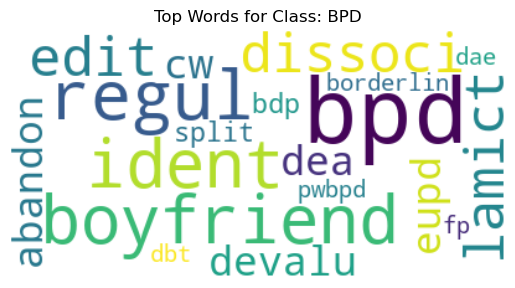


Top features for class: anxiety
['stutter', 'panick', 'breath', 'rabi', 'vaccin', 'exposur', 'buspar', 'dae', 'overthink', 'anxeiti', 'palpit', 'covid', 'flight', 'worri', 'pandem', 'buspiron', 'panic', 'anxious', 'gad', 'anxieti']


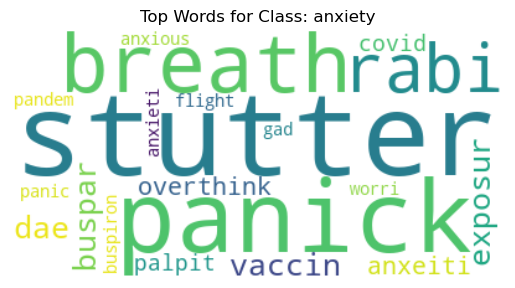


Top features for class: bipolar
['vraylar', 'episod', 'unmed', 'lamotrigin', 'tegretol', 'invega', 'stabl', 'polar', 'mix', 'dbt', 'bd', 'lithium', 'lamict', 'hypo', 'hypomania', 'mania', 'hypoman', 'manic', 'bp', 'bipolar']


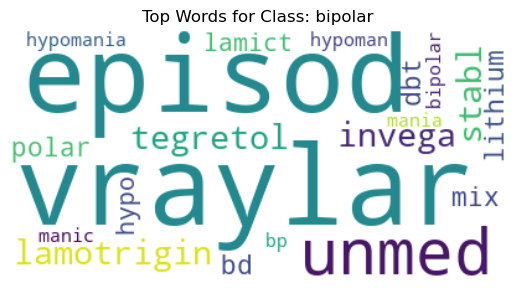


Top features for class: depression
['painless', 'wellbutrin', 'dug', 'leech', 'telehealth', 'sport', 'immigr', 'dysthymia', 'unal', 'loser', 'clinic', 'rig', 'slave', 'life', 'kms', 'lonli', 'antidepress', 'que', 'mdd', 'depress']


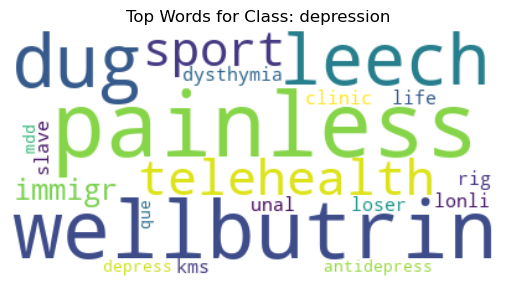


Top features for class: mentalillness
['ocd', 'schizo', 'anorexia', 'mentalhealth', 'quarantin', 'quut', 'psychatrist', 'gad', 'mdd', 'schizoaffect', 'borderlin', 'mentalil', 'anxieti', 'schizophren', 'mental', 'fp', 'bipolar', 'schizophrenia', 'bpd', 'kjv']


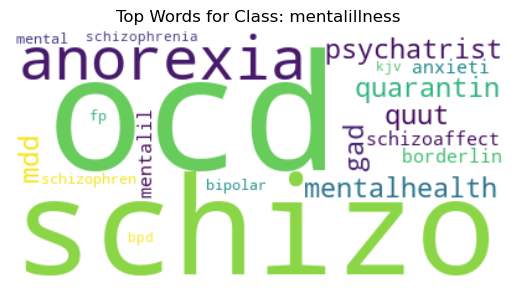


Top features for class: schizophrenia
['selfi', 'prodrom', 'ap', 'hallucin', 'olanzapin', 'jog', 'alogia', 'clozaril', 'voic', 'scizophrenia', 'clozapin', 'delus', 'invega', 'bff', 'sza', 'schizo', 'sz', 'schizophren', 'schizoaffect', 'schizophrenia']


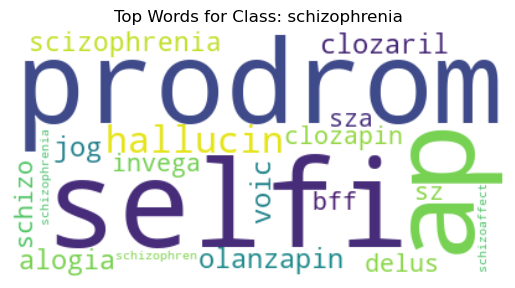

In [8]:
def display_top_words_wordcloud(model, vectorizer, n):
    """
    Function to display the top n words in a wordcloud.
    """
    for i, class_label in enumerate(model.classes_):
        print("\nTop features for class:", class_label)
        top_features_idx = model.coef_[i].argsort()[-n:]
        top_features = [vectorizer.get_feature_names_out()[j] for j in top_features_idx]
        
        print(top_features)
        
        # Generate word cloud
        wordcloud_text = ' '.join(top_features)
        wordcloud = WordCloud(background_color='white').generate(wordcloud_text)
        
        # Plot word cloud
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title("Top Words for Class: " + class_label)
        plt.axis("off")
        plt.show()
        
        
display_top_words_wordcloud(lr_model, vectorizer, 20)

# Best and worst predictions

In [9]:
def best_worst_accuracy(model, X_test, org_test, y_test):
    """
    Print the best and the worst prediction for each class. 
    """
    
    prob = model.predict_proba(X_test)
    pred = model.predict(X_test)
    
    df_merged = pd.concat([pd.DataFrame(y_test.reset_index(drop=True)), pd.DataFrame(prob).reset_index(drop=True), pd.DataFrame(org_test['post']).reset_index(drop=True), pd.DataFrame(pred, columns = ['pred']).reset_index(drop=True)], axis=1)
    
    for index in range(len(model.classes_)): 
        
        class_subset = df_merged[df_merged['subreddit'] == model.classes_[index]]
        
        index_max = class_subset[index].idxmax()
        index_min = class_subset[index].idxmin()
                       
        post_max = class_subset.loc[index_max]['post']
        post_min = class_subset.loc[index_min]['post']
        
        proba_max = class_subset.loc[index_max][index]
        proba_min = class_subset.loc[index_min][index]
                
        pred_max = class_subset.loc[index_max]['pred']
        pred_min = class_subset.loc[index_min]['pred']

        print(f'True Label: {model.classes_[index]}\n--------------------')
        print(f'Best prediction: {post_max}\nProbability [True label]: {proba_max}\nPredicted Label: {pred_max}')
        print(f'\nLowest prediction: {post_min}\nProbability [True label]: {proba_min}\nPredicted Label: {pred_min}\n\n')
    
best_worst_accuracy(lr_model, X_test_sparse, org_test, y_test_sparse)

True Label: BPD
--------------------
Best prediction: Do I have bpd? How can I be sure if I have bpd?
Probability [True label]: 0.9999999999985949
Predicted Label: BPD

Lowest prediction: Feeling anxious for no reason Does anyone else start getting random anxiety, then overthink it and make yourself believe it's a bad omen which leads to MORE anxiety?
Probability [True label]: 2.072566475112741e-06
Predicted Label: anxiety


True Label: anxiety
--------------------
Best prediction: Anxiety Nfndj
Probability [True label]: 0.9999999666015131
Predicted Label: anxiety

Lowest prediction: You may also have this major unknown source of anxiety in your life If you have ever felt like walking on eggshells around someone in your life, this(these) person(s) may really well have BPD (Borderline Personality Disorder).

These people are extremely manipulative to the point you may not even realize you have been manipulated, but the underlying stress and damage are there in your subconsciousness.

Th